## Import libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data_ball = pd.read_csv('training_dataset/DataSet/IPL_Ball_by_Ball_2008_2022.csv')
data_match = pd.read_csv('training_dataset/DataSet/IPL_Matches_Result_2008_2022.csv')
data_ipl_2k23_player_team=pd.read_csv('training_dataset/DataSet/Ipl_2023 _cricketers - Players.csv')

## Data Loading

In [23]:
data_ball.head(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [24]:
data_match.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [25]:
data_ipl_2k23_player_team.head(5)

,player,Team
0,YBK Jaiswal,RR
1,JC Buttler,RR
2,SV Samson,RR
3,D Padikkal,RR
4,SO Hetmyer,RR


### Extract target variable

In [26]:
X,y = data_ball.drop('total_run',axis=1),data_ball['total_run']

## Data preprocessing

### Encoding

In [27]:
player_list = ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Ashwin', 'R Parag', 'TA Boult', 'OC McCoy', 'WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel', 'JR Hazlewood', 'Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'PK Garg', 'Abhishek Sharma', 'RA Tripathi', 'AK Markram', 'N Pooran', 'Washington Sundar', 'R Shepherd', 'J Suchith', 'B Kumar', 'Umran Malik', 'JM Bairstow', 'S Dhawan', 'M Shahrukh Khan', 'MA Agarwal', 'LS Livingstone', 'JM Sharma', 'PN Mankad', 'PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant', 'SN Khan', 'R Powell', 'AR Patel', 'SN Thakur', 'Kuldeep Yadav', 'Ishan Kishan', 'RG Sharma', 'D Brevis', 'Tilak Varma', 'TH David', 'Ramandeep Singh', 'DR Sams', 'RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagadeesan', 'AT Rayudu', 'MS Dhoni', 'Simarjeet Singh', 'MJ Santner', 'R Tewatia', 'Rashid Khan', 'VR Iyer', 'N Rana', 'A Tomar', 'SS Iyer', 'SW Billings', 'AD Russell', 'RK Singh', 'SP Narine', 'UT Yadav', 'KS Williamson', 'T Stubbs', 'R Sanjay Yadav', 'JJ Bumrah', 'Lalit Yadav', 'PBB Rajapaksa', 'Harpreet Brar', 'R Dhawan', 'RD Chahar', 'K Rabada', 'Arshdeep Singh', 'JDS Neesham', 'A Badoni', 'JO Holder', 'Mohsin Khan', 'Avesh Khan', 'S Dube', 'AM Rahane', 'Shashank Singh', 'M Jansen', 'Mohammed Siraj', 'RV Uthappa', 'DJ Bravo', 'M Theekshana', 'Mukesh Choudhary', 'HR Shokeen', 'HE van der Dussen', 'KS Bharat', 'KS Sharma', 'SP Jackson', 'PJ Cummins', 'TG Southee', 'KA Pollard', 'M Ashwin', 'K Kartikeya', 'RP Meredith', 'RV Patel', 'A Nortje', 'KK Ahmed', 'Kartik Tyagi', 'Fazalhaq Farooqi', 'B Indrajith', 'AJ Finch', 'AS Roy', 'Shivam Mavi', 'Harshit Rana', 'SA Yadav', 'B Sai Sudharsan', 'Mandeep Singh', 'SA Abbott', 'S Gopal', 'RA Jadeja', 'D Pretorius', 'PJ Sangwan', 'LH Ferguson', 'AS Joseph', 'KK Nair', 'DJ Mitchell', 'A Manohar', 'M Prasidh Krishna', 'SS Prabhudessai', 'MK Pandey', 'JD Unadkat', 'Anuj Rawat', 'Yash Dayal', 'NT Ellis', 'VG Arora', 'Ravi Bishnoi', 'CV Varun', 'V Shankar', 'P Simran Singh', 'OF Smith', 'FA Allen', 'TS Mills', 'Aman Hakim Khan', 'YS Chahal', 'KR Sen', 'Akash Deep', 'K Gowtham', 'Rasikh Salam', 'CJ Jordan', 'DJ Willey', 'SE Rutherford', 'Abdul Samad', 'TL Seifert', 'Mustafizur Rahman', 'Navdeep Saini', 'Anmolpreet Singh', 'RA Bawa', 'NM Coulter-Nile', 'EJG Morgan', 'Shakib Al Hasan', 'AB de Villiers', 'DT Christian', 'TK Curran', 'SK Raina', 'SS Tiwary', 'J Yadav', 'SPD Smith', 'CH Morris', 'C Sakariya', 'JJ Roy', 'S Kaul', 'KA Jamieson', 'AF Milne', 'CH Gayle', 'KM Jadhav', 'GD Phillips', 'Sandeep Sharma', 'SM Curran', 'DL Chahar', 'T Shamsi', 'GHS Garton', 'MC Henriques', 'K Yadav', 'PP Chawla', 'Mohammad Nabi', 'Sachin Baby', 'DJ Malan', 'Mohammed Shami', 'Virat Singh', 'KL Nagarkoti', 'Harbhajan Singh', 'Mujeeb Ur Rahman', 'JA Richardson', 'CR Woakes', 'S Nadeem', 'BA Stokes', 'CA Lynn', 'SP Goswami', 'Gurkeerat Singh', 'AT Carey', 'JC Archer', 'SS Cottrell', 'T Banton', 'M Vijay', 'SR Watson', 'P Dubey', 'JR Philippe', 'T Natarajan', 'I Udana', 'VR Aaron', 'TU Deshpande', 'Imran Tahir', 'AS Rajpoot', 'DW Steyn', 'NS Naik', 'AJ Tye', 'JL Pattinson', 'DS Kulkarni', 'MJ McClenaghan', 'C Munro', 'KMA Paul', 'A Mishra', 'I Sharma', 'MJ Guptill', 'Basil Thampi', 'YK Pathan', 'PA Patel', 'C de Grandhomme', 'STR Binny', 'IS Sodhi', 'CA Ingram', 'H Klaasen', 'P Negi', 'BB Sran', 'AJ Turner', 'DR Shorey', 'CR Brathwaite', 'AD Nath', 'GC Viljoen', 'Y Prithvi Raj', 'KC Kariappa', 'BCJ Cutting', 'RK Bhui', 'JL Denly', 'SD Lad', 'HF Gurney', 'Yuvraj Singh', 'MM Sharma', 'GH Vihari', 'S Lamichhane', 'P Ray Barman', 'M Markande', 'JPR Scantlebury-Searles', 'MK Tiwary', 'AD Hales', 'Anureet Singh', 'DJM Short', 'P Chopra', 'JP Duminy', 'NV Ojha', 'BB McCullum', 'LE Plunkett', 'MG Johnson', 'CJ Anderson', 'G Gambhir', 'B Laughlin', 'A Dananjaya', 'B Stanlake', 'R Vinay Kumar', 'MA Wood', 'LMP Simmons', 'KV Sharma', 'IR Jaggi', 'Bipul Sharma', 'SL Malinga', 'Vishnu Vinod', 'TM Head', 'MN Samuels', 'Z Khan', 'SE Marsh', 'Swapnil Singh', 'DR Smith', 'JP Faulkner', 'Ankit Soni', 'P Kumar', 'MM Patel', 'HM Amla', 'S Aravind', 'S Badree', 'A Choudhary', 'IK Pathan', 'AR Bawne', 'DM Bravo', 'AP Tare', 'AD Mathews', 'Ankit Sharma', 'R Bhatia', 'A Zampa', 'AB Dinda', 'Iqbal Abdulla', 'ER Dwivedi', 'R Sathish', 'SB Jakati', 'F Behardien', 'KJ Abbott', 'UT Khawaja', 'GJ Bailey', 'NLTC Perera', 'M Morkel', 'PV Tambe', 'S Kaushik', 'UBT Chand', 'A Nehra', 'PSP Handscomb', 'A Ashish Reddy', 'Parvez Rasool', 'JA Morkel', 'KP Pietersen', 'KW Richardson', 'P Sahu', 'D Wiese', 'MEK Hussey', 'MA Starc', 'Azhar Mahmood', 'BE Hendricks', 'RS Bopara', 'J Botha', 'GB Hogg', 'Karanveer Singh', 'RN ten Doeschate', 'NJ Maddinson', 'V Sehwag', 'J Theron', 'DJ Muthuswami', 'MS Bisla', 'Noor Ahmad', 'RR Rossouw', 'AN Ahmed', 'RG More', 'DJG Sammy', 'CM Gautam', 'DJ Hussey', 'PP Ojha', 'BJ Hodge', 'Y Venugopal Rao', 'S Anirudha', 'YV Takawale', 'VH Zol', 'S Rana', 'KK Cooper', 'VS Malik', 'M de Lange', 'Shivam Sharma', 'WD Parnell', 'LRPL Taylor', 'R Shukla', 'DH Yagnik', 'M Manhas', 'LR Shukla', 'L Balaji', 'JH Kallis', 'BR Dunk', 'CA Pujara', 'R Rampaul', 'AM Nayar', 'S Badrinath', 'R Dravid', 'CL White', 'BB Samantray', 'P Dogra', 'LJ Wright', 'RV Gomez', 'DPMD Jayawardene', 'B Chipli', 'BJ Rohrer', 'AC Gilchrist', 'SK Trivedi', 'RE van der Merwe', 'DB Das', 'SMSM Senanayake', 'SR Tendulkar', 'MC Juneja', 'AB Agarkar', 'LA Pomersbach', 'A Mithun', 'M Kartik', 'Harmeet Singh', 'P Awana', 'UA Birla', 'M Rawat', 'K Upadhyay', 'MS Gony', 'KC Sangakkara', 'R McLaren', 'PA Reddy', 'BMAJ Mendis', 'OA Shah', 'TL Suman', 'BAW Mendis', 'R Sharma', 'S Narwal', 'B Lee', 'A Mukund', 'TM Dilshan', 'KB Arun Karthik', 'J Syed Mohammad', 'X Thalaivan Sargunam', 'AG Murtaza', 'IC Pandey', 'A Chandila', 'S Sreesanth', 'SW Tait', 'PC Valthaty', 'AD Mascarenhas', 'RT Ponting', 'AB McDonald', 'RJ Harris', 'DB Ravi Teja', 'MDKJ Perera', 'AL Menaria', 'Sunny Gupta', 'JEC Franklin', 'RP Singh', 'M Muralitharan', 'P Parameswaran', 'JD Ryder', 'MJ Clarke', 'SC Ganguly', 'AP Majumdar', 'CJ Ferguson', 'Harpreet Singh', 'SD Chitnis', 'N Saini', 'HH Gibbs', 'Y Nagar', 'MD Mishra', 'AC Thomas', 'DJ Harris', 'AA Jhunjhunwala', 'AUK Pathan', 'RJ Peterson', 'AA Chavan', 'V Pratap Singh', 'RE Levi', 'DL Vettori', 'KMDN Kulasekara', 'AC Blizzard', 'DJ Jacobs', 'CJ McKay', 'M Kaif', 'BA Bhatt', 'RR Bhatkal', 'A Singh', 'DAJ Bracewell', 'DE Bollinger', 'Y Gnaneswara Rao', 'JJ van der Wath', 'CK Langeveldt', 'S Sohal', 'FY Fazal', 'PR Shah', 'JDP Oram', 'SK Warne', 'ND Doshi', 'S Sriram', 'JR Hopes', 'TR Birt', 'MJ Lumb', 'A Symonds', 'MV Boucher', 'AS Raut', 'SJ Srivastava', 'M Klinger', 'RR Powar', 'Sunny Singh', 'L Ablish', 'I Malhotra', 'GC Smith', 'SB Wagh', 'NL McCullum', 'B Akhil', 'TD Paine', 'JE Taylor', 'VVS Laxman', 'BJ Haddin', 'Joginder Sharma', 'S Randiv', 'SA Asnodkar', 'AG Paunikar', 'R Ninan',
               'NJ Rimmington', 'SB Styris', 'ML Hayden', 'CRD Fernando', 'Anirudh Singh', 'B Sumanth', 'A Kumble', 'WPUJC Vaas', 'PD Collingwood', 'AC Voges', 'Pankaj Singh', 'C Madan', 'KP Appanna', 'ST Jayasuriya', 'AP Dole', 'MF Maharoof', 'AB Barath', 'T Thushara', 'RS Sodhi', 'AA Bilakhia', 'Jaskaran Singh', 'K Goel', 'KAJ Roach', 'S Ladda', 'DP Nannes', 'JM Kemp', 'DR Martyn', 'RS Gavaskar', 'SE Bond', 'A Uniyal', 'S Tyagi', 'YA Abdulla', 'Mohammad Ashraful', 'SM Katich', 'WA Mota', 'RJ Quiney', 'NK Patel', 'T Henderson', 'Yashpal Singh', 'SS Shaikh', 'Mashrafe Mortaza', 'C Nanda', 'Shoaib Ahmed', 'AN Ghosh', 'LA Carseldine', 'MN van Wyk', 'SM Harwood', 'L Ronchi', 'RR Raje', 'W Jaffer', 'D du Preez', 'R Bishnoi', 'TM Srivastava', 'GR Napier', 'FH Edwards', 'SB Bangar', 'A Flintoff', 'T Kohli', 'A Chopra', 'Kamran Khan', 'S Vidyut', 'CK Kapugedera', 'Kamran Akmal', 'Sohail Tanvir', 'Mohammad Asif', 'VY Mahesh', 'GD McGrath', 'AS Yadav', 'Shahid Afridi', 'SP Fleming', 'SM Pollock', 'Salman Butt', 'Umar Gul', 'Misbah-ul-Haq', 'LPC Silva', 'M Ntini', 'VS Yeligati', 'Mohammad Hafeez', 'DJ Thornely', 'H Das', 'DNT Zoysa', 'J Arunkumar', 'DT Patil', 'Abdur Razzak', 'Shoaib Malik', 'Shoaib Akhtar', 'PM Sarvesh Kumar', 'DP Vijaykumar', 'Younis Khan', 'D Salunkhe', 'T Taibu', 'RR Sarwan', 'VRV Singh', 'U Kaul', 'S Chanderpaul', 'D Kalyankrishna', 'MA Khote', 'SB Joshi', 'DS Lehmann', 'AA Noffke', 'R Sai Kishore', 'M Pathirana', 'PH Solanki', 'DG Nalkande', 'IC Porel', 'AU Rashid', 'S Sandeep Warrier', 'Akash Singh', 'KM Asif', 'L Ngidi', 'LI Meriwala', 'Jalaj S Saxena', 'Monu Kumar', 'CJ Green', 'K Khejroliya', 'O Thomas', 'JP Behrendorff', 'SC Kuggeleijn', 'S Midhun', 'CJ Dala', 'MJ Henry', 'NB Singh', 'SS Agarwal', 'Tejas Baroka', 'SM Boland', 'JW Hastings', 'GS Sandhu', 'P Suyal', 'K Santokie', 'BW Hilfenhaus', 'Anand Rajan', 'MG Neser', 'TP Sudhindra', 'RW Price', 'SS Mundhe', 'P Prasanth', 'AM Salvi', 'AA Kazi', 'MB Parmar', 'C Ganapathy', 'RA Shaikh', 'SS Sarkar', 'RR Bose', 'B Geeves', 'A Nel', 'Gagandeep Singh', 'P Amarnath', 'Harry Brook', 'Joe Root', 'Cameron Green', 'Sikandar Raza', 'Litton Das', 'Kusal Mendis', 'Phil Salt', 'Reece Topley', 'Akeal Hosein', 'Shubham Khajuria', 'Rohan Kunnummal', 'Chethan L.R.', 'Shaik Rasheed', 'Saurabh Kumar', 'Vivrant Sharma', 'Nishant Sindhu', 'Sanvir Singh', 'Samarth Vyas', 'Dinesh Bana', 'Abhimanyu Easwaran', 'Sumit Kumar', 'Upendra Singh Yadav', 'Mukesh Kumar', 'Lance Morris', 'Yash Thakur', 'Mujtaba Yousuf', 'Chintal Gandhi', 'Izharulhuq Naveed', 'Himanshu Sharma', 'Subhranshu Senapati', 'Will Jacks', 'Paul Stirling', 'Dasun Shanaka', 'Taskin Ahmed', 'Blessing Muzarabani', 'Johnson Charles', 'Andre Fletcher', 'Shai Hope', 'Tom Latham', 'Ben Mcdermott', 'Lorcan Tucker', 'Pukhraj Mann', 'Akshat Raghuwanshi', 'Himanshu Rana', 'Shoun Roger', 'Will Smeed', 'Manoj Bhandage', 'Gerald Coetzee', 'Duan Jansen', 'Evan Jones', 'Abid Mushtaq', 'Suryansh Shedge', 'Akash Vashisht', 'Donovan Ferreira', 'Urvil Patel', 'Kirant Shinde', 'Vishnu Solanki', 'Vidwath Kaverappa', 'Rajan Kumar', 'Ravi Kumar', 'Arzan Nagwaswalla', 'Akash Singh', 'Paul Van Meekeren', 'Vyshak Vijay Kumar', 'S.Ajith Ram', 'Satyajeet Bachhav', 'Yuvraj Chudasama', 'Peter Hatzoglou', 'Karthik Meiyappan', 'Suyash Sharma', 'Shivam Sharma', 'Reeza Hendricks', 'Christiaan Jonker', 'Brandon King', 'Pathum Nissaanka', 'Harry Tector', 'Najibullah Zadran', 'Qais Ahmad', 'Charith Asalanka', 'Michael Bracewell', 'Jamie Overton', 'Richard Gleeson', 'Naveen Ul Haq', 'Lahiru Kumara', 'Joshua Little', 'Dilshan Madushanka', 'Luke Wood', 'Priyansh Arya', 'Matthew Breetzke', 'Shivam Chauhan', 'Rahul Gahlaut', 'Sudip Gharami', 'Amandeep Khare', 'Bhanu Pania', 'Ekant Sen', 'Himanshu Bisht', 'Mickil Jaiswal', 'G.Aniketh Reddy', 'Atit Sheth', 'Tanay Thyagarajann', 'Sumeet Verma', 'Ajitesh Guruswamy', 'Yash Kothari', 'Suresh Kumar', 'Kumar Kushagra', 'Anmol Malhotra', 'Robin Minz', 'Agniv Pan', 'Priyesh Patel', 'Mitesh Patel', 'Abishek Porel', 'Nitish Kumar Reddy', 'Bharat Sharma', 'Vivek Singh', 'Basit Bashir', 'Nandre Burger', 'Sakib Hussain', 'Waseem Khanday', 'Ravi Kiran Majeti', 'Anuj Raj', 'Avinash Singh', 'Prince Yadav', 'Mushtaq Beg', 'Rocky Bhasker', 'Sanjith Devaraj', 'Raghav Goyal', 'Allah Mohammad', 'Lalit Mohan', 'Bhuwan Rohilla', 'Aman Sharma', 'Manav Suthar', 'Afif Hossain', 'Sisanda Magala', 'Craig Overton', 'Dhananjaya Silva', 'Dunith Wellalage', 'Daryn Dupavillon', 'David Payne', 'Glenton Stuurman', 'Anirudh Balachander', 'Gourav Choudhary', 'Saurav Chuahan', 'Kumar Deobrat', 'Chirag Gandhi', 'Madhav Kaushik', 'Priyank Panchal', 'Ayush Pandey', 'Rohan Patil', 'Sanjay Ramaswamy', 'Siddharth Yadav', 'Rehan Ahmed', 'Vaisakh Chandran', 'Harsh Dubey', 'Tanush Kotian', 'Ninad Rathva', 'B. Surya', 'Jordan Thompson', 'Shivank Vashisth', 'Christopher Benjamin', 'Connor Esterhuizen', 'Mohd Arslan Khan', 'Mamidi Krishna', 'Fazil Makaya', 'Kunal Rathore', 'Ateev Saini', 'Bipin Saurabh', 'B.R. Sharath', 'Yashovardhan Singh', 'Lakshay Thareja', 'Mohit Avasthi', 'Ottneil Baartman', 'Gurnoor Singh Brar', 'Shahrukh Dar', 'Thomas Helm', 'Venkatesh Muralidhara', 'Geet Puri', 'E. Sanketh', 'Ajay Sarkar', 'Ashok Sharma', 'Kanwar Singh', 'Roston Chase', 'Rahkeem Cornwall', 'Karim Janat', 'Keshav Maharaj', 'Shivam Chaudhary', 'Ashwin Das', 'James Fuller', 'Chirag Jani', 'Akshay Karnewar', 'Bhagmender Lather', 'Lone Muzaffar', 'Pulkit Narang', 'Rohit Rayudu', 'Sameer Rizvi', 'Tunish Sawkar', 'Sonu Yadav', 'Auqib Dar', 'Mukhtar Hussain', 'Ashwani Kumar', 'Hemant Kumar', 'Nathan McAndrew', 'Rajesh Mohanty', 'Ravi Sharma', 'Vikash Singh', 'Ruben Trumpelmann', 'Koushik Vasuki', 'Vasu Vats', 'Shubham Agrawal', 'Anshul Kamboj', 'Azim Kazi', 'Dev Lakra', 'Ajay Mandal', 'Abdul P A', 'Jitender Pal', 'Ritwik Roy Chowdhury', 'Shubham Singh', 'Avneesh Sudha', 'Asad Jamil Ahmed', 'Aashish Bhatt', 'McKenny Clarke', 'Shubham Kapse', 'Gourav Koul', 'Raunak Kumar', 'Trilok Nag', 'Atal Bihari Rai', 'Ramon Simmonds', 'Rajeev Singh', 'Mohd. Wasim', 'Atharva Ankolekar', 'Khizar Dafedar', 'Naman Dhir', 'Sahil Dhiwan', 'Sampark Gupta', 'Jordan Hermann', 'Hayden Kerr', 'Salman Khan', 'Sairaj Patil', 'Divyaansh Saxena', 'Purnank Tyagi', 'Deepraj Gaonkar', 'Deepesh Nailwal', 'Arjun Rapria', 'Shashwat Rawat', 'Sumit Ruikar', 'Rajandeep Singh', 'Anunay Singh', 'Digvesh Singh', 'Pranshu Vijayran', 'Prerit Dutta', 'Ramakrishna Ghosh', 'Shubhang Hegde', 'Shamshuzama Kazi', 'Ayaz Khan', 'Amit Pachhara', 'Akul Pandove', 'Mohit Rathee', 'Garv Sangwan', 'Shubham Sharma', 'Nehal Wadhera', 'Amit Yadav', 'Amit Ali', 'Rishabh Chauhan', 'Matthew Forde', 'Sammar Gajjar', 'Rajneesh Gurbani', 'Divyansh Joshi', 'Dhruv Patel', 'Jack Prestwidge', 'Aditya Sarvate', 'Mayank Dagar', 'Sagar Solanki', 'Prenelan Subrayen', 'Bhagath Verma', 'Rajvardhan Hangargekar', 'Mayank Yadav', 'Rahmanullah Gurbaz', 'Kyle Mayers', 'Yudhvir Singh', 'Arjun Tendulkar', 'Arshad Khan', 'Shams Mulani', 'Matthew Short', 'Baltej Singh', 'Atharva Taide', 'Shivam Singh', 'Dhruv Jurel']

In [28]:
# Encoding of player names
encoding = list(
    enumerate(list(set(X.batter.unique().tolist() + X.bowler.unique().tolist() + X["non-striker"].unique().tolist() + list(set(player_list))))))

In [29]:
# Encoding dataframe for merging in with player names, each player gets unique value whether they are batter or bowler
batter_encoded = pd.DataFrame(
    encoding, columns=['player_id', 'batter'])

bowler_encoded = pd.DataFrame(
    encoding, columns=['player_id', 'bowler'])

non_striker_encoded = pd.DataFrame(
    encoding, columns=['player_id', 'non-striker'])

In [30]:
X = pd.merge(X, bowler_encoded, on = 'bowler')
X = pd.merge(X, batter_encoded, on = 'batter')
X = pd.merge(X, non_striker_encoded, on = 'non-striker')
X.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'player_id_x', 'player_id_y',
       'player_id'],
      dtype='object')

In [31]:
X = X.drop(['batter', 'bowler', 'non-striker'], axis = 1)
X.head()

,ID,innings,overs,ballnumber,extra_type,batsman_run,extras_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,player_id_x,player_id_y,player_id
0,1312200,1,0,1,NaN,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,291,693,238
1,1312200,1,0,2,legbyes,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,291,693,238
2,1312200,1,0,4,NaN,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,291,693,238
3,1312200,1,0,5,NaN,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,291,693,238
4,1312200,1,0,6,NaN,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,291,693,238


In [32]:
X = X.rename(columns={'player_id_x': 'bowler_encoded', 'player_id_y': 'batter_encoded', 'player_id': 'non_striker_encoded'})

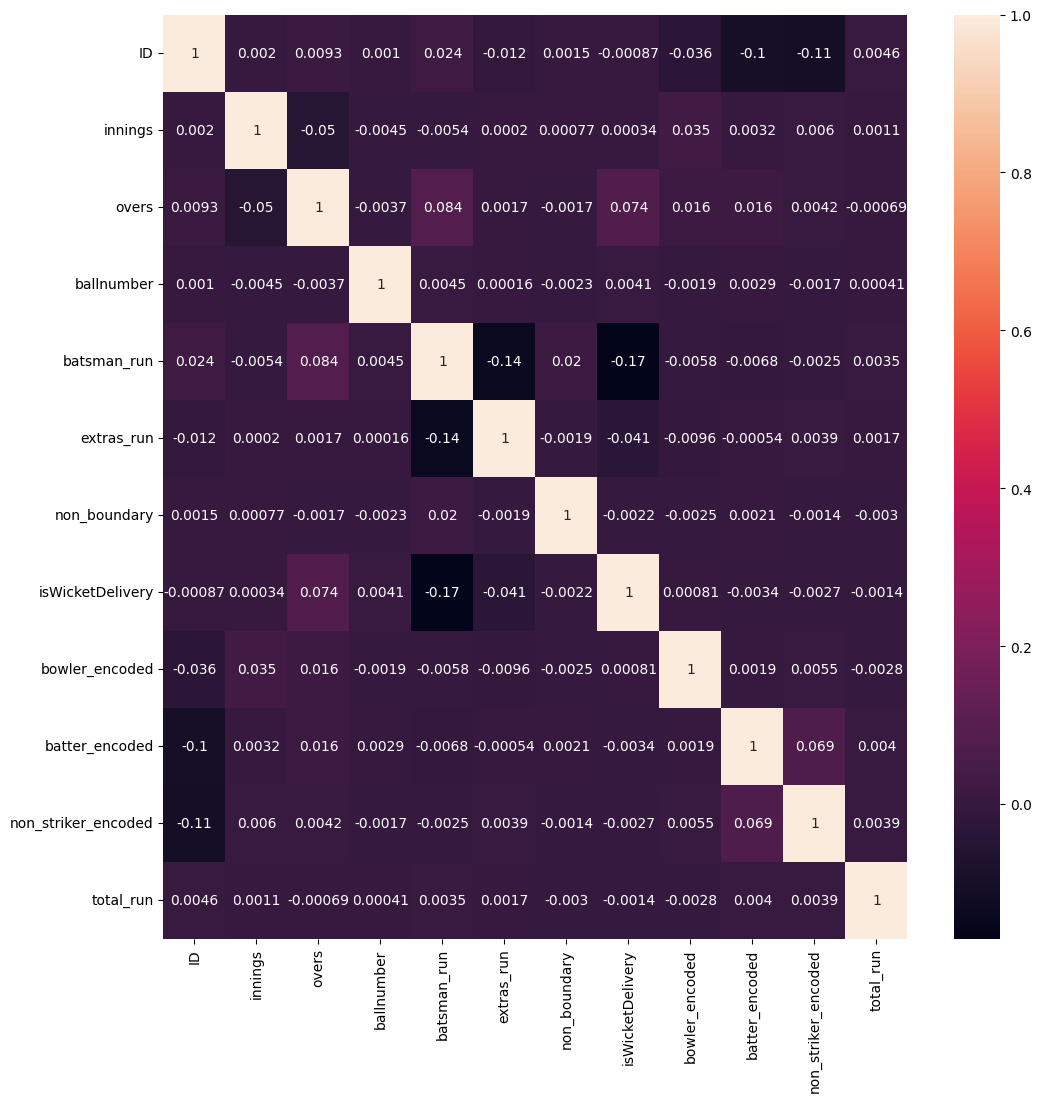

In [33]:
X_new = pd.concat([X.drop(['extra_type','player_out','kind','fielders_involved', 'BattingTeam'], axis=1),y],axis=1)
plt.figure(figsize=(12,12))
sns.heatmap(X_new.corr(),annot=True)
plt.show()

In [34]:
X_le = X[['non_boundary', 'isWicketDelivery','bowler_encoded','batter_encoded','non_striker_encoded']]

In [35]:
X_le

,non_boundary,isWicketDelivery,bowler_encoded,batter_encoded,non_striker_encoded
0,0,0,291,693,238
1,0,0,291,693,238
2,0,0,291,693,238
3,0,0,291,693,238
4,0,0,291,693,238
...,...,...,...,...,...
225949,0,0,745,698,753
225950,0,0,367,603,753
225951,0,0,367,603,753
225952,0,0,367,603,753


## Linear Regression

In [36]:
from imblearn.combine import SMOTETomek
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [37]:
# Sampling
sampler = SMOTETomek(random_state=0)
X_resampled, y_resampled = sampler.fit_resample(X_le, y)

In [38]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [39]:
# Obtaining mean squared error for different value of degrees
degree = range(1, 7)
mse = []
for k in degree:
    poly = PolynomialFeatures(degree=k)
    X_train_poly = poly.fit_transform(X_train)
    lr_reg = LinearRegression()
    lr_reg.fit(X_train_poly, y_train)

    X_test_poly = poly.transform(X_test)
    y_pred = lr_reg.predict(X_test_poly)
    mse.append(mean_squared_error(y_test, y_pred))

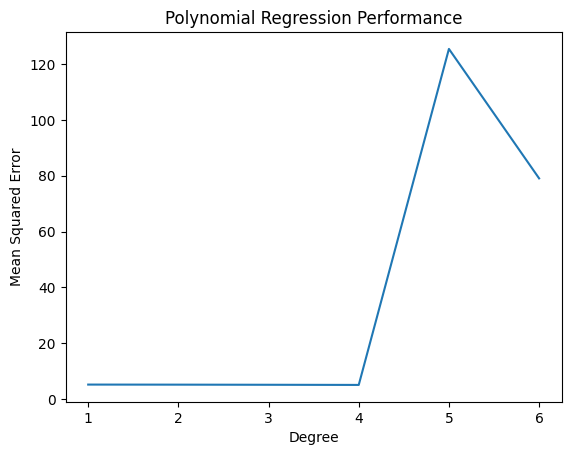

In [40]:
# Using elbow method to identify the best degree
plt.plot(degree, mse)
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.title('Polynomial Regression Performance')
plt.show()